[]

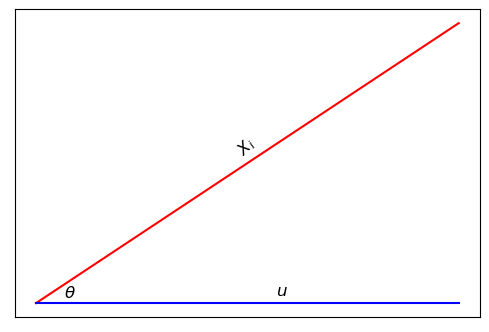

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
newX = np.arange(0,3,.01)
slope = 3
newY = (slope*newX)
Data = np.concatenate([newX[:,np.newaxis],newY[:,np.newaxis]],axis=1)
ax.plot(newX,newY,c="r")
ax.plot([0,newX[-1]],[0,0],c="b")
ax.annotate(r"$\theta$",(0,0),textcoords="offset points",xytext=(20,4),fontsize=12)
ax.annotate(r"$u$",(1.5,0),textcoords="offset points",xytext=(20,6),fontsize=12)
ax.annotate(r"$X_{i}$",(1.2,4.5),textcoords="offset points",xytext=(20,6),fontsize=12,rotation=45)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

Then:

$$
\begin{array}[t]{ll}
(1) & \text{Coord}_{u}(X_i) = \, \mid\! X_{i} \!\mid \cos{\theta} =\,
          \mid\! X_{i} \!\mid  \frac{X_{i}\cdot u}{ \,\mid X_{i} \mid \cdot \mid u \mid\,} =\,
         \mid\! X_{i} \!\mid  \frac{X_{i}\cdot u}{\, \mid X_{i} \mid \cdot \,1} = X_{i}\cdot u
\end{array}
$$  


Here we've used a standard formula for the cosine of the angle between
two vectors, which, happily, does not require knowing the angle.
And the result is that the coordinate of a point $X_i$ with respect to an axis, is just
the dot product of the $X_{i}$ vector with the unit vector in the direction
of the axis.

Let's drill one level deeper to see what a component (or new axis) really is.  The dot product of two vectors is the sum of the products of their corresponding
values.  Here's what dot product
actually amounts to for our data, with $u$ the first column of `axes` and
`Xi` row $i$ of the data:

$$
\begin{array}[t]{lcl}
\text{Coord}_{u}(X_{i}) &=& X_{i}\cdot u\\
                        &=& X_{i}[0]\cdot u[0] +
                            X_{i}[1]\cdot u[1] +
                            X_{i}[2]\cdot u[2] +
                            X_{i}[3]\cdot u[3]
\end{array}
$$

That is, the first coordinate for the transformed version of $X_{i}$ is actually a linear combination of the 
original coordinates of $X_{i}$, with the coefficients given by $u$, the first or **principle**
component.  The second coordinate will be the dot product of $X_{i}$ with the
second component  (`axes[1]`). 

Conveniently, Equation (1) means that the way to transform an entire data set `X` into the new
coordinate system is just
the matrix product of  the axes (`axes`, shape 2x4) with our transposed data `X.T`.  Writing $U$  for the
matrix that contains the unit vectors for the axes, that matrix product is usually written this way:

$$
U\,X^{T}
$$

For our example, $U$ = `axes` and the 1D array containing the $X_{i}$ coordinates with respect to both
axes is just the matrix product of `axes` with $X_i$.

The code to demonstrate this (matrix product in `numpy` is `@`):